 #  Ecommerce Data Analysis on My SQL

# Introduction
In the fast-paced world of online commerce, effective data management is essential for the success of any e-commerce platform. This MySQL project is designed to create a robust and scalable database system specifically tailored for the needs of an e-commerce business. By focusing on data modeling, normalization, query optimization, security, and scalability, the project aims to deliver a reliable foundation that ensures seamless operations and enhances the overall efficiency of an e-commerce platform.

# *Objective:*
The objective of this data analysis project is to gain insights into the ecommerce order data of a fictional company. We will analyze customer information, product details, and order history to derive meaningful conclusions that can aid business decision-making.
some potential analyses we are going to perform:
## *Customer Analysis:*
Identify the total number of customers city wise. Identify the most frequent customers based on their order history.
## *Product Analysis:*
Determine the total number of products available by category. Analyze the distribution of products across sub-categories. Identify products with low stock levels.
## *Sales Analysis:*
Analyze the performance of different product categories in terms of sales. Identify the  products based on selling prices.
## *Customer Order Patterns:*
Determine the most preferred payment modes.
## *Geographical Analysis:*
Explore the distribution of customers across different cities. Analyze whether certain products or categories are more     popular in a specific city.
## *Payment Analysis:*
  Display successful and pending payments order counts.


## **Dataset Overview:**
The dataset consists of three main tables:
* *customer:* Contains information about customers, including their ID, name, contact details, and address.
* *product:* Contains details about the products available for purchase, including product ID, name, category, and pricing.
* *order_details:* Captures information about customer orders, including order ID, customer ID, product ID, quantity, total     price, payment mode, order date, and order status.

# Database Connectivity

In [195]:
import mysql.connector
def databaseConnect():
    mydb = mysql.connector.connect(
    host="localhost",
    user= "root",
    password= "root",
    database= "eecommerce"
    )
    
    return mydb

# Importing Data 

In [196]:

import mysql.connector
import pandas as pd

connection = mysql.connector.connect(
user='root',
password='root',
host='localhost',
database='eecommerce'
)
mycursor = connection.cursor()
mycursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(mycursor.fetchall(), columns=[desc[0] for desc in mycursor.description])
mycursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(mycursor.fetchall(), columns=[desc[0] for desc in mycursor.description])
mycursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(mycursor.fetchall(), columns=[desc[0] for desc in mycursor.description])

print(customer_data.head())
print(product_data.head())
print(order_data.head())


  customer_id            name           city                     email  \
0        C001        John Doe       New York        john.doe@email.com   
1        C002      Jane Smith    Los Angeles      jane.smith@email.com   
2        C003     Bob Johnson        Chicago     bob.johnson@email.com   
3        C004  Alice Williams  San Francisco  alice.williams@email.com   
4        C005       Raj Patel         Mumbai       raj.patel@email.com   

      phone_no       address  pin_code  
0  +1234567890   123 Main St     10001  
1  +9876543210   456 Oak Ave     90001  
2  +1122334455  789 Elm Blvd     60601  
3  +9988776655   321 Pine Ln     94105  
4  +9123456789  456 Beach Rd    400001  
  product_id   product_name     category   sub_category  original_price  \
0       P001         Laptop  Electronics      Computers          1200.0   
1       P002     Smartphone  Electronics        Mobiles           800.0   
2       P003     Desk Chair    Furniture  Office Chairs           150.0   
3       P

# Data Cleaning


In [197]:
import pandas as pd
conn=databaseConnect()

sql="select * from customer"
customerFrame=pd.read_sql(sql,conn).head()
customerFrame.dropna(inplace=True)
customerFrame.drop_duplicates(inplace=True)

sql="select * from product"
productFrame=pd.read_sql(sql,conn).head()
productFrame.dropna(inplace=True)
productFrame.drop_duplicates(inplace=True)

sql="select * from order_details"
orderFrame=pd.read_sql(sql,conn).head()
orderFrame.dropna(inplace=True)
orderFrame.drop_duplicates(inplace=True)

print("After fixing data...")

print(customerFrame)
print(productFrame)
print(orderFrame)

After fixing data...
  customer_id            name           city                     email  \
0        C001        John Doe       New York        john.doe@email.com   
1        C002      Jane Smith    Los Angeles      jane.smith@email.com   
2        C003     Bob Johnson        Chicago     bob.johnson@email.com   
3        C004  Alice Williams  San Francisco  alice.williams@email.com   
4        C005       Raj Patel         Mumbai       raj.patel@email.com   

      phone_no       address  pin_code  
0  +1234567890   123 Main St     10001  
1  +9876543210   456 Oak Ave     90001  
2  +1122334455  789 Elm Blvd     60601  
3  +9988776655   321 Pine Ln     94105  
4  +9123456789  456 Beach Rd    400001  
  product_id   product_name     category   sub_category  original_price  \
0       P001         Laptop  Electronics      Computers          1200.0   
1       P002     Smartphone  Electronics        Mobiles           800.0   
2       P003     Desk Chair    Furniture  Office Chairs        

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\1580929231.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customerFrame=pd.read_sql(sql,conn).head()
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\1580929231.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productFrame=pd.read_sql(sql,conn).head()
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\1580929231.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orderFrame=pd.read_sql(sql,conn).head()


# **Exploratory Data Analysis (EDA) and Visualization**


- ## **Distribution of Customer By Cities**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\4044537185.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customerFrame=pd.read_sql(sql,conn)


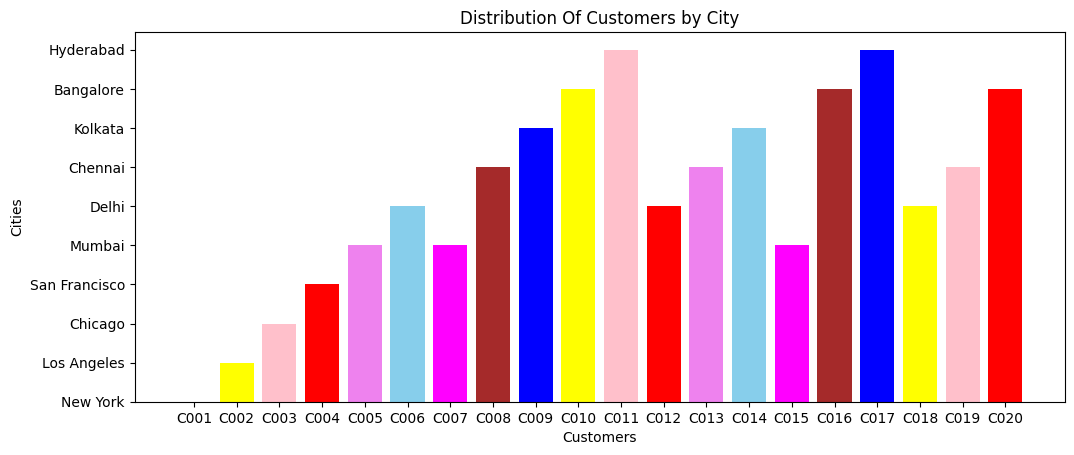

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from customer"
customerFrame=pd.read_sql(sql,conn)
customerFrame.dropna(inplace=True)
plt.figure().set_figwidth(12)
mycolor=np.array(['blue','yellow','pink', 'red', 'violet', 'skyblue', 'magenta', 'brown'])
plt.bar(customerFrame['customer_id'], customerFrame['city'], color=mycolor)
plt.title('Distribution Of Customers by City')
plt.xlabel('Customers')
plt.ylabel('Cities')
plt.show()

- ## **Distribution by Product Category**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\2866186564.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productFrame=pd.read_sql(sql,conn)


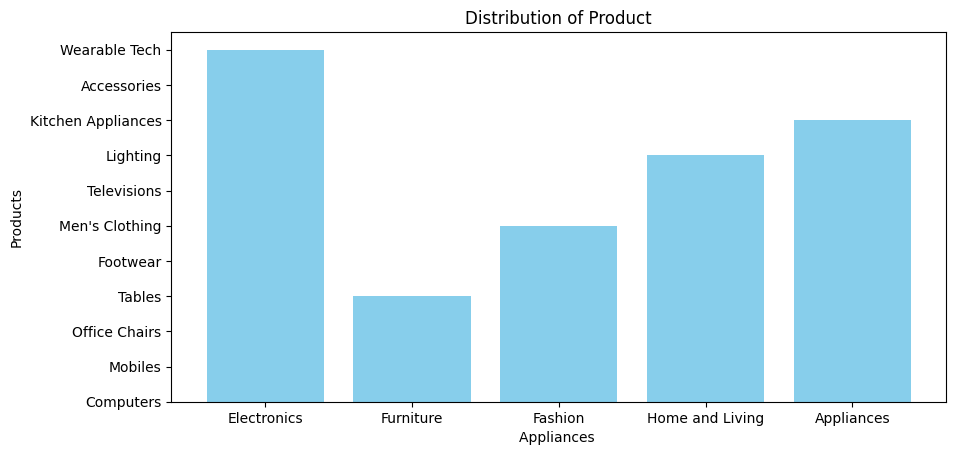

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from product"
productFrame=pd.read_sql(sql,conn)
productFrame.dropna(inplace=True)
plt.figure().set_figwidth(10)
mycolor=np.array (['skyblue'])
plt.bar(productFrame['category'], productFrame['sub_category'], color=mycolor)
plt.title('Distribution of Product')
plt.xlabel('Appliances ')
plt.ylabel('Products')
plt.show()

- ## **Distribution By Product Category**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\3148907394.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productFrame=pd.read_sql(sql,conn)


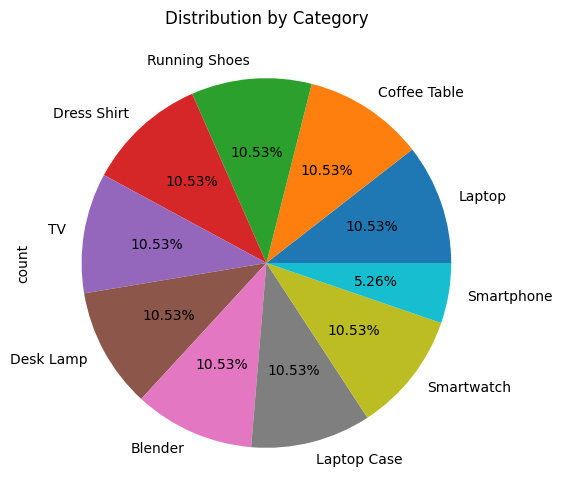

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from product"
productFrame=pd.read_sql(sql,conn)
productFrame.dropna(inplace=True)
plt.figure(figsize=(7,6))
productFrame['product_name'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%',)
plt.title('Distribution by Category')
plt.show()

- ## **Distribution By stock**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\116779698.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productFrame=pd.read_sql(sql,conn)


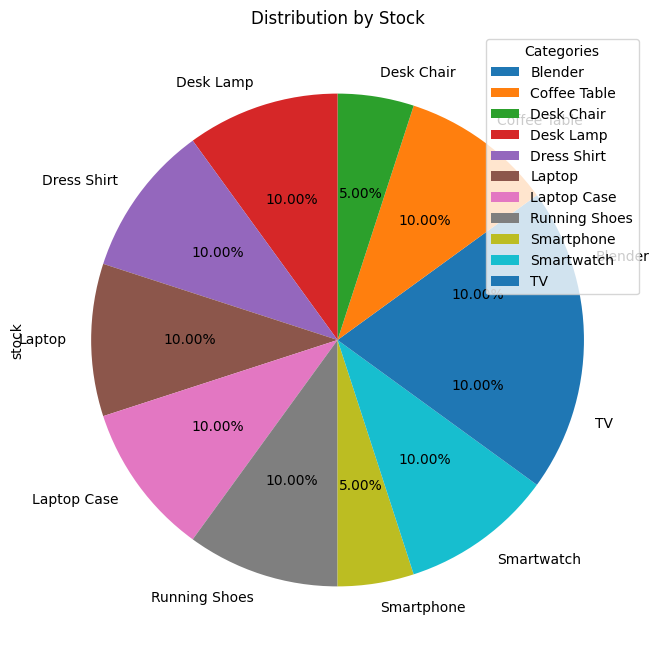

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from product"
productFrame=pd.read_sql(sql,conn)
productFrame.dropna(inplace=True)
plt.figure(figsize=(8,8))
mycolor = np.array(['blue', 'green', 'red', 'brown', 'skyblue', 'orange','skyblue','magenta', 'cyan', 'yellow'])
productFrame['stock'].groupby(productFrame['product_name']).size().plot(kind='pie',autopct='%1.2f%%', color=mycolor)
plt.title('Distribution by Stock')
plt.legend(title='Categories')
plt.show()

- ## **Distribution of Product by selling price**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\3268312377.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productFrame=pd.read_sql(sql,conn)


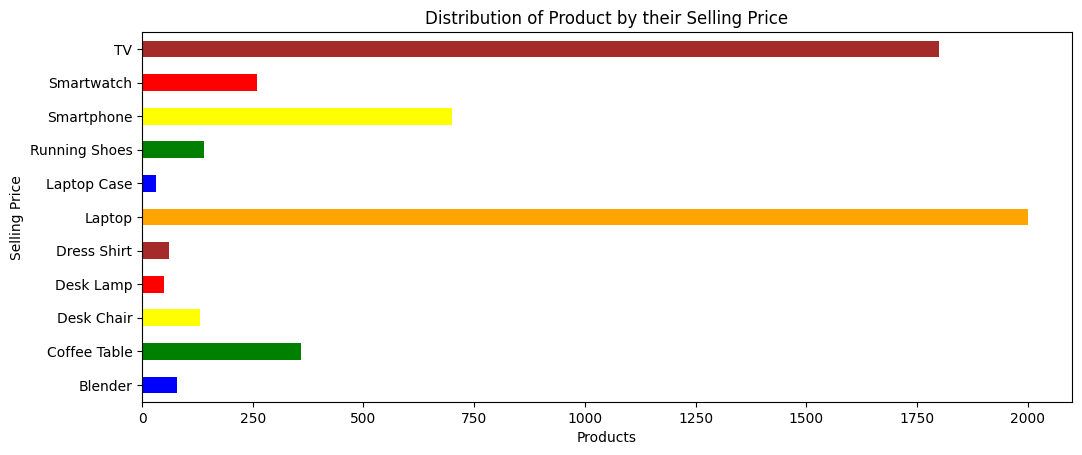

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from product"
productFrame=pd.read_sql(sql,conn)
productFrame.dropna(inplace=True)
plt.figure().set_figwidth(12)
mycolor=np.array (['blue', 'Green', 'yellow', 'red', 'brown', 'orange'])
productFrame['selling_price'].groupby(productFrame['product_name']).sum().plot(kind='barh', color=mycolor)
plt.title('Distribution of Product by their Selling Price')
plt.xlabel('Products')
plt.ylabel('Selling Price')
plt.show()

- ## **Order Status of customers**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\3228723214.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orderFrame=pd.read_sql(sql,conn)


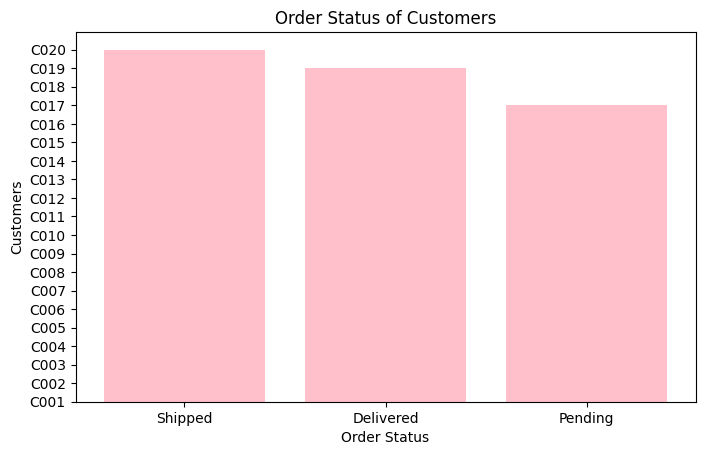

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from order_details"
orderFrame=pd.read_sql(sql,conn)
orderFrame.dropna(inplace=True)
plt.figure().set_figwidth(8,5)
mycolor= np.array(['pink'])
plt.bar(orderFrame['order_status'], orderFrame['customer_id'], color=mycolor)
plt.title('Order Status of Customers')
plt.xlabel('Order Status')
plt.ylabel('Customers')
plt.show()

- ## **Payment Methods** 

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\2321552300.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orderFrame=pd.read_sql(sql,conn)


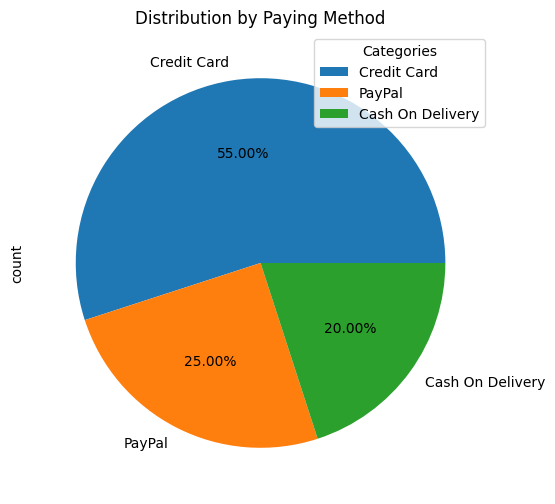

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from order_details"
orderFrame=pd.read_sql(sql,conn)
orderFrame.dropna(inplace=True)
plt.figure(figsize=(7,6))
orderFrame['payment_mode'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribution by Paying Method')
plt.legend(title='Categories')
plt.show()

- ## **No. of Products**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\3781811439.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productFrame=pd.read_sql(sql,conn)


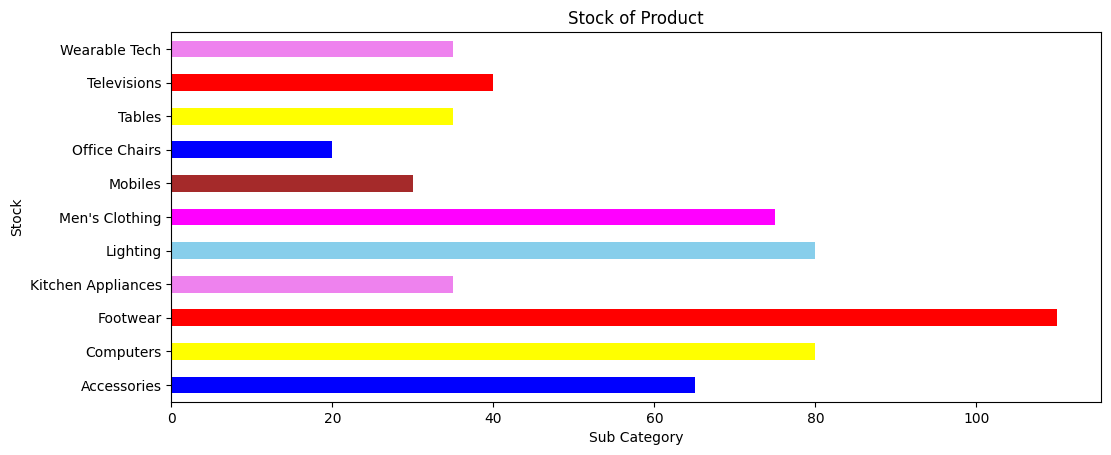

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from product"
productFrame=pd.read_sql(sql,conn)
productFrame.dropna(inplace=True)
plt.figure().set_figwidth(12)
mycolor=np.array (['blue','yellow', 'red', 'violet', 'skyblue', 'magenta', 'brown']) 
productFrame['stock'].groupby(productFrame['sub_category']).sum().plot(kind='barh', color=mycolor)
plt.title('Stock of Product')
plt.xlabel('Sub Category')
plt.ylabel('Stock')
plt.show()

- # **Comparision of Original Price vs Selling Price**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\761224494.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  productFrame=pd.read_sql(sql,conn)


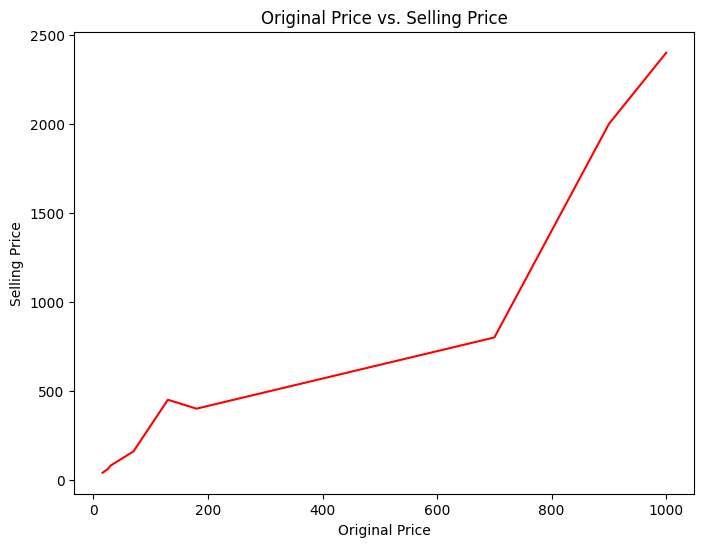

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from product"
productFrame=pd.read_sql(sql,conn)
productFrame.dropna(inplace=True)
plt.figure(figsize=(8,6)) 
productFrame['original_price'].groupby(productFrame['selling_price']).sum().plot(kind='line', color='red')
plt.title('Original Price vs. Selling Price')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')
plt.show()

- # **Order Status by Date of Order**

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_15544\935556132.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orderFrame=pd.read_sql(sql,conn)


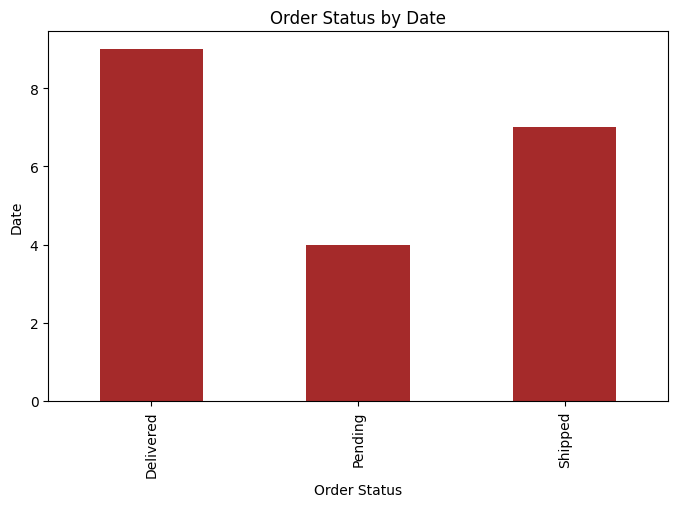

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
conn=databaseConnect()
sql="Select * from order_details"
orderFrame=pd.read_sql(sql,conn)
orderFrame.dropna(inplace=True)
plt.figure().set_figwidth(8)
mycolor=np.array (['brown']) 
orderFrame['order_date'].groupby(orderFrame['order_status']).size().plot(kind='bar', color=mycolor)
plt.title('Order Status by Date')
plt.xlabel('Order Status')
plt.ylabel('Date')
plt.show()

# Conclusion:
In conclusion, our e-commerce SQL project has been a journey of turning data into meaningful insights and creating a robust foundation for online commerce. By implementing a well-structured relational database, we've paved the way for efficient management of customer information, product details, and order processing. The integration of SQL queries has not only streamlined data retrieval but also empowered us to derive valuable analytics, such as customer preferences and popular products. This project has not just been about coding and databases; it's about building a seamless and trustworthy e-commerce experience. The careful design of tables, foreign key relationships, and constraints ensures data integrity and consistency throughout the system. The  data visualization tools has provided a dynamic means to comprehend trends, track sales, and make informed decisions. Bar graphs and charts have transformed raw data into actionable insights, enabling stakeholders to grasp the pulse of the business.

#     **Acknowledgement**

I would like to express my sincere gratitude to Suramya Biswas for his continuous support and guidance during the entire duration of
my project. His expertise, encouragement, and insightful feedback have been instrumental in shaping the project and enhancing my 
understanding of the subject.Working individually on this project allowed me to explore and navigate various challenges, and I am
thankful for my teachers patient guidance and mentorship, which significantly contributed to the successful completion of this work.
This project has not only allowed me to apply theoretical knowledge to practical scenarios but has also provided a platform for 
personal and academic growth. I am thankful for the opportunity to explore into the world of data visualization and its 
applications.In conclusion, I extend my gratitude to all those who played a role, directly or indirectly, in making this project 
a reality. The skills acquired and lessons learned will undoubtedly shape my future academic and professional endeavors.
